In [30]:
import pandas as pd
import os
os.getcwd()
movies = pd.read_csv('Section6_Movie-Ratings.csv')
movies.head()
movies.columns
#movies.info()
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies['Year of release'] = movies['Year of release'].astype('category')
movies.info()
movies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Film                       559 non-null    category
 1   Genre                      559 non-null    category
 2   Rotten Tomatoes Ratings %  559 non-null    int64   
 3   Audience Ratings %         559 non-null    int64   
 4   Budget (million $)         559 non-null    int64   
 5   Year of release            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $)
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [35]:
movies.Genre.cat.categories
movies['Year of release'].cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

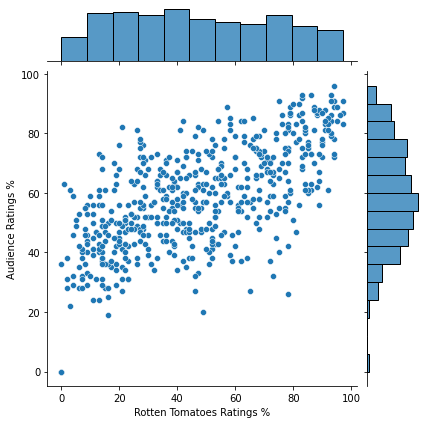

In [38]:
# Joint plot
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
j = sns.jointplot(data=movies, x='Rotten Tomatoes Ratings %', y='Audience Ratings %')

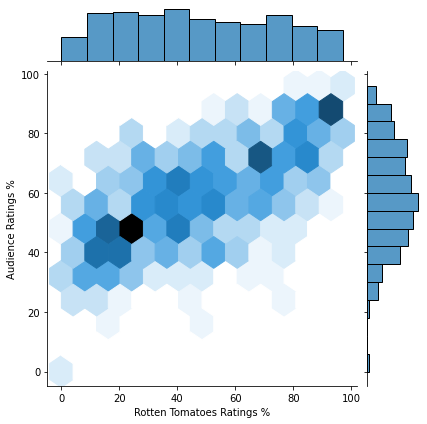

In [41]:
j = sns.jointplot(data=movies, x='Rotten Tomatoes Ratings %', y='Audience Ratings %', kind="hex")

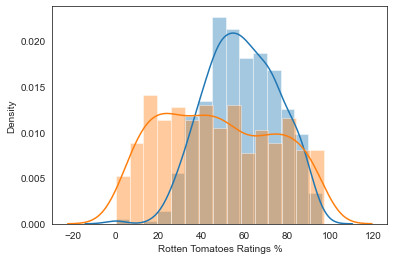

In [55]:
# histogram
#sns.set_style('white')
m1 = sns.distplot(movies['Audience Ratings %'], bins=15)
#n1 = plt.hist(movies['Rotten Tomatoes Ratings %'], bins=15)
m2 = sns.distplot(movies['Rotten Tomatoes Ratings %'], bins=15)

<function matplotlib.pyplot.show(close=None, block=None)>

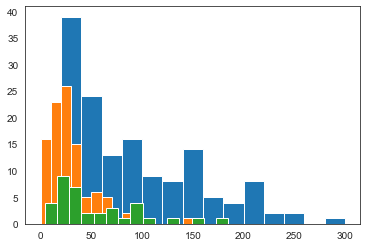

In [59]:
# stacked histogram
plt.hist(movies[movies.Genre == 'Action']['Budget (million $)'], bins=15)
plt.hist(movies[movies.Genre == 'Drama']['Budget (million $)'], bins=15)
plt.hist(movies[movies.Genre == 'Thriller']['Budget (million $)'], bins=15)
plt.show()

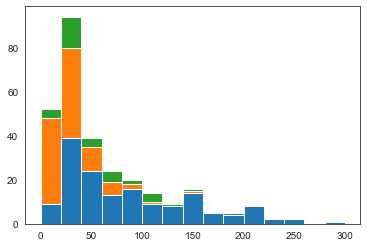

In [87]:
plt.hist([movies[movies.Genre == 'Action']['Budget (million $)'], \
    movies[movies.Genre == 'Drama']['Budget (million $)'], \
    movies[movies.Genre == 'Thriller']['Budget (million $)']], bins=15, stacked=True)
plt.show()

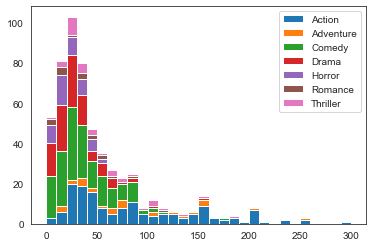

In [84]:
plotlist = list()
for gen in movies.Genre.cat.categories:
    plotlist.append(movies[movies.Genre == gen]['Budget (million $)'])
plt.hist(plotlist, bins=30, stacked=True, rwidth=1, label=movies.Genre.cat.categories)
plt.legend()
plt.show()

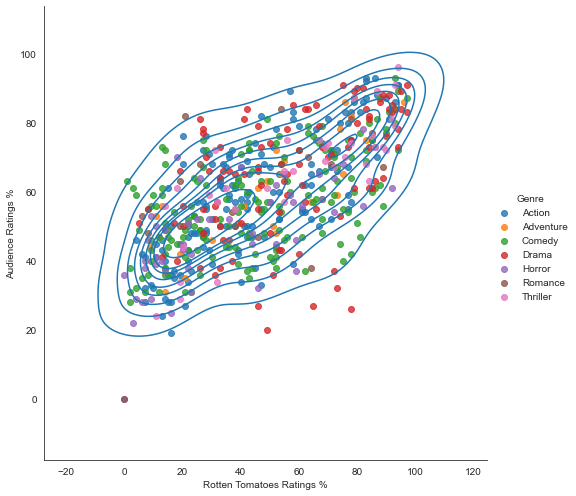

In [99]:
# Kernel Density Estimate (KDE) plot
vis1 = sns.lmplot(data=movies, x='Rotten Tomatoes Ratings %', y='Audience Ratings %', \
                  fit_reg=False, hue='Genre', size=7, aspect=1)
k1 = sns.kdeplot(movies['Rotten Tomatoes Ratings %'], movies['Audience Ratings %'])

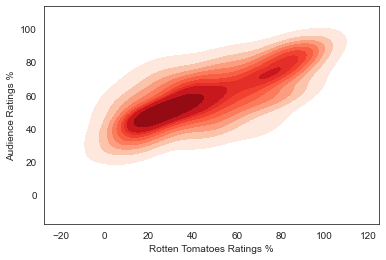

In [106]:
k1 = sns.kdeplot(movies['Rotten Tomatoes Ratings %'], movies['Audience Ratings %'], \
                 shade=True, shade_lowest=False, cmap='Reds')

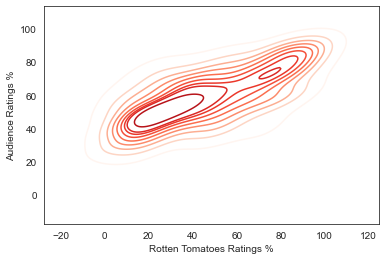

In [105]:
k1b = sns.kdeplot(movies['Rotten Tomatoes Ratings %'], movies['Audience Ratings %'], cmap='Reds')

[(-20.0, 160.0)]

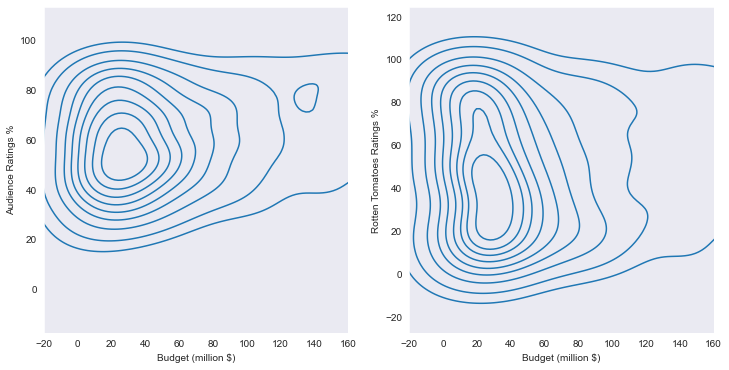

In [128]:
# Working with Subplots()
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('dark')
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True)
k1 = sns.kdeplot(movies['Budget (million $)'], movies['Audience Ratings %'], ax=axes[0])
k2 = sns.kdeplot(movies['Budget (million $)'], movies['Rotten Tomatoes Ratings %'], ax=axes[1])
k1.set(xlim=(-20,160))

[(-20.0, 160.0)]

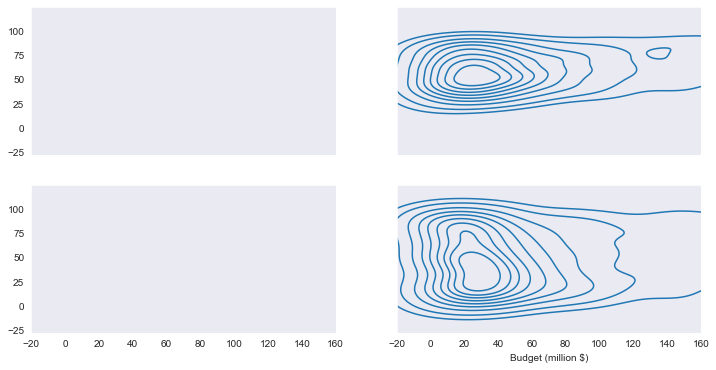

In [124]:
f, axes = plt.subplots(2,2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies['Budget (million $)'], movies['Audience Ratings %'], ax=axes[0,1])
k2 = sns.kdeplot(movies['Budget (million $)'], movies['Rotten Tomatoes Ratings %'], ax=axes[1,1])
k1.set(xlim=(-20,160))

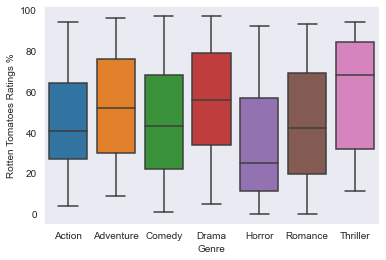

In [133]:
# Box and Violin Plots
b = sns.boxplot(data=movies, x='Genre', y='Rotten Tomatoes Ratings %')

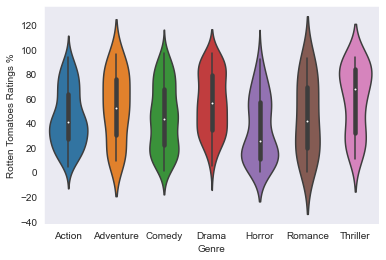

In [132]:
v = sns.violinplot(data=movies, x='Genre', y='Rotten Tomatoes Ratings %')

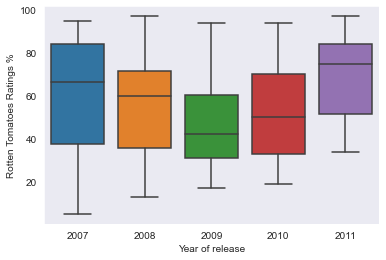

In [136]:
by = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year of release', y='Rotten Tomatoes Ratings %')

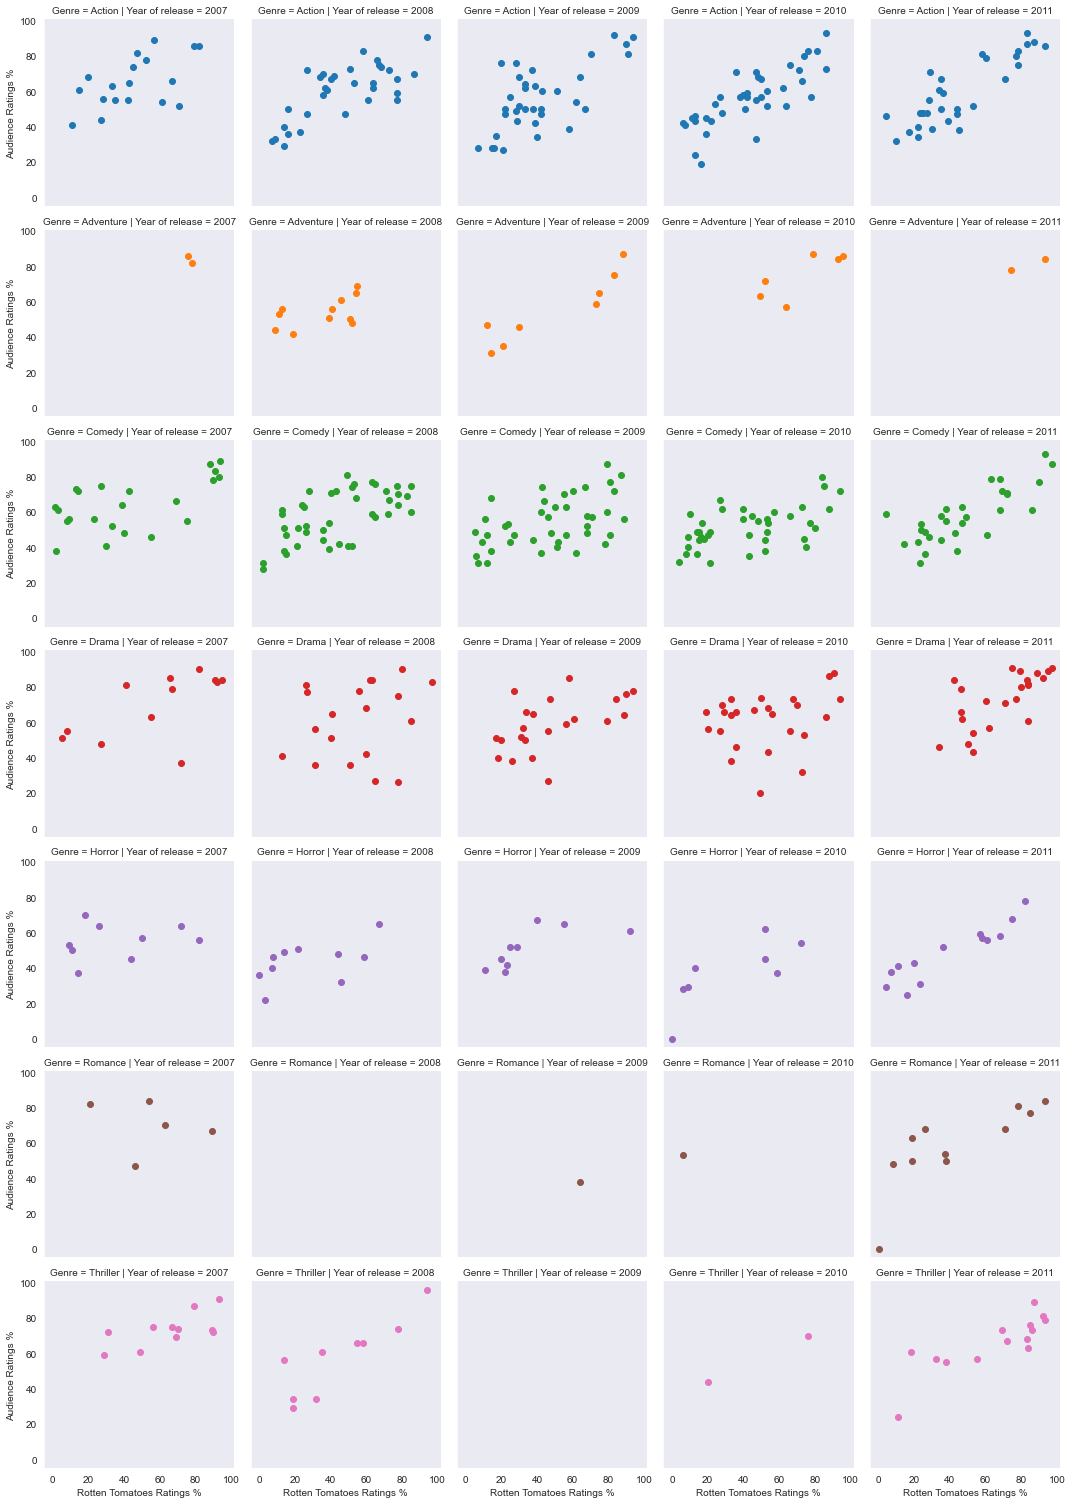

In [141]:
# Facet grids
#g = sns.FacetGrid(movies, row='Genre', hue='Genre')
gs = sns.FacetGrid(movies, row='Genre', col='Year of release', hue='Genre')
gs = gs.map(plt.scatter, 'Rotten Tomatoes Ratings %', 'Audience Ratings %')

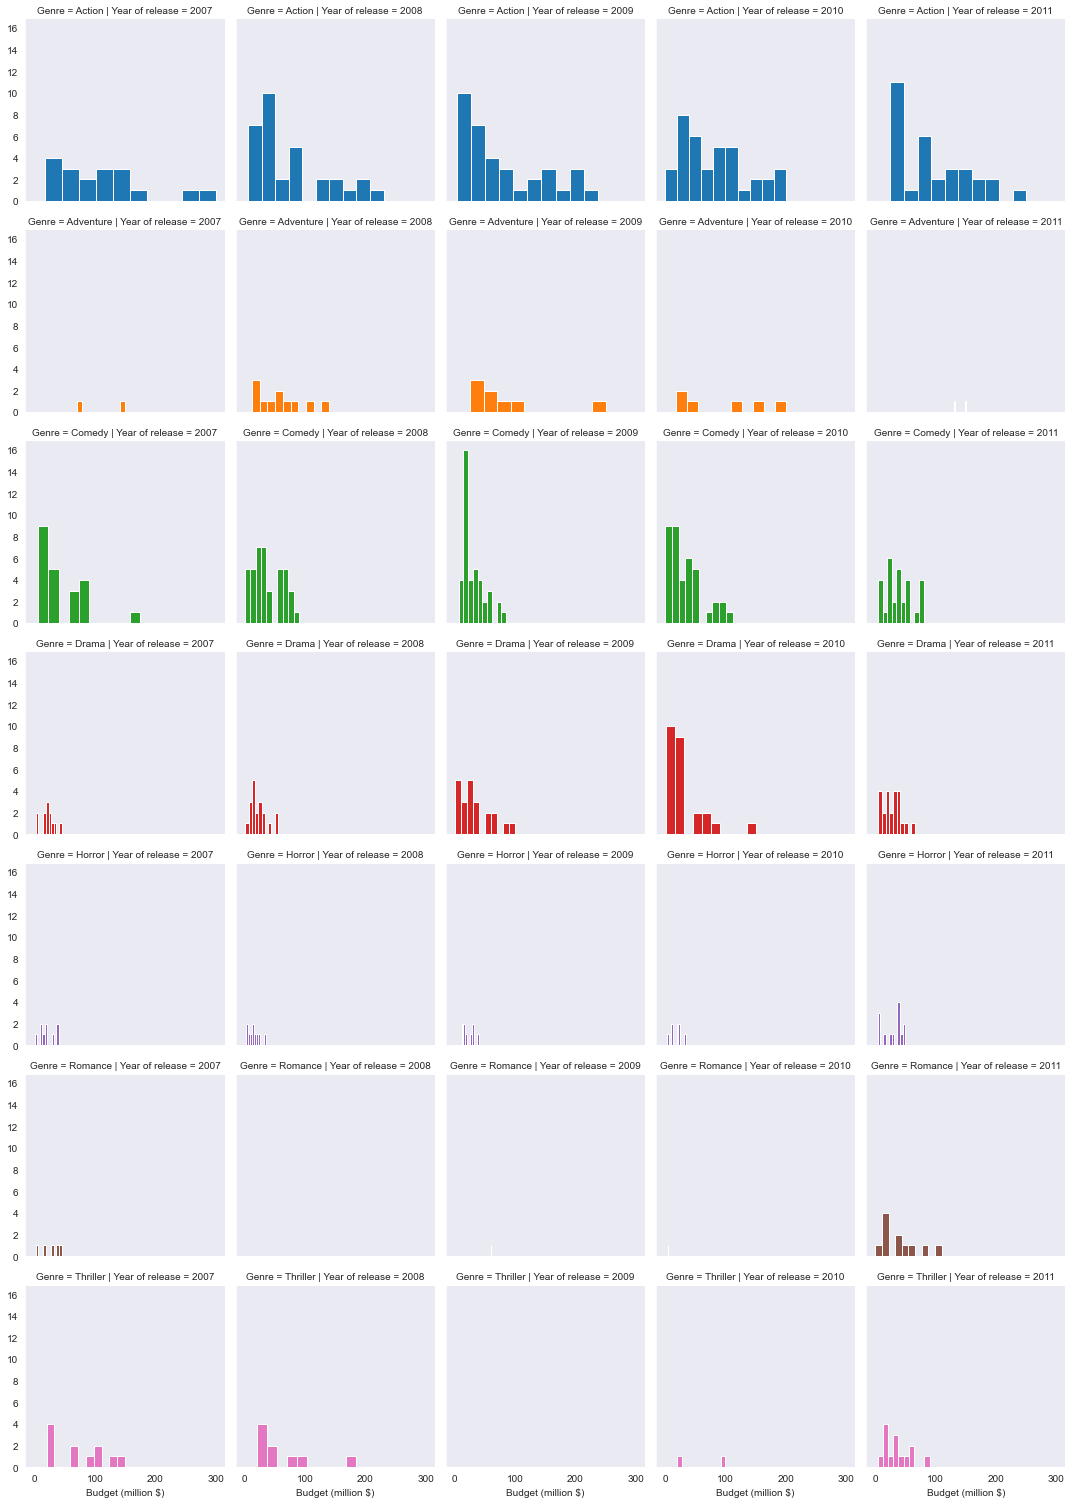

In [144]:
gh = sns.FacetGrid(movies, row='Genre', col='Year of release', hue='Genre')
gh = gh.map(plt.hist, 'Budget (million $)')

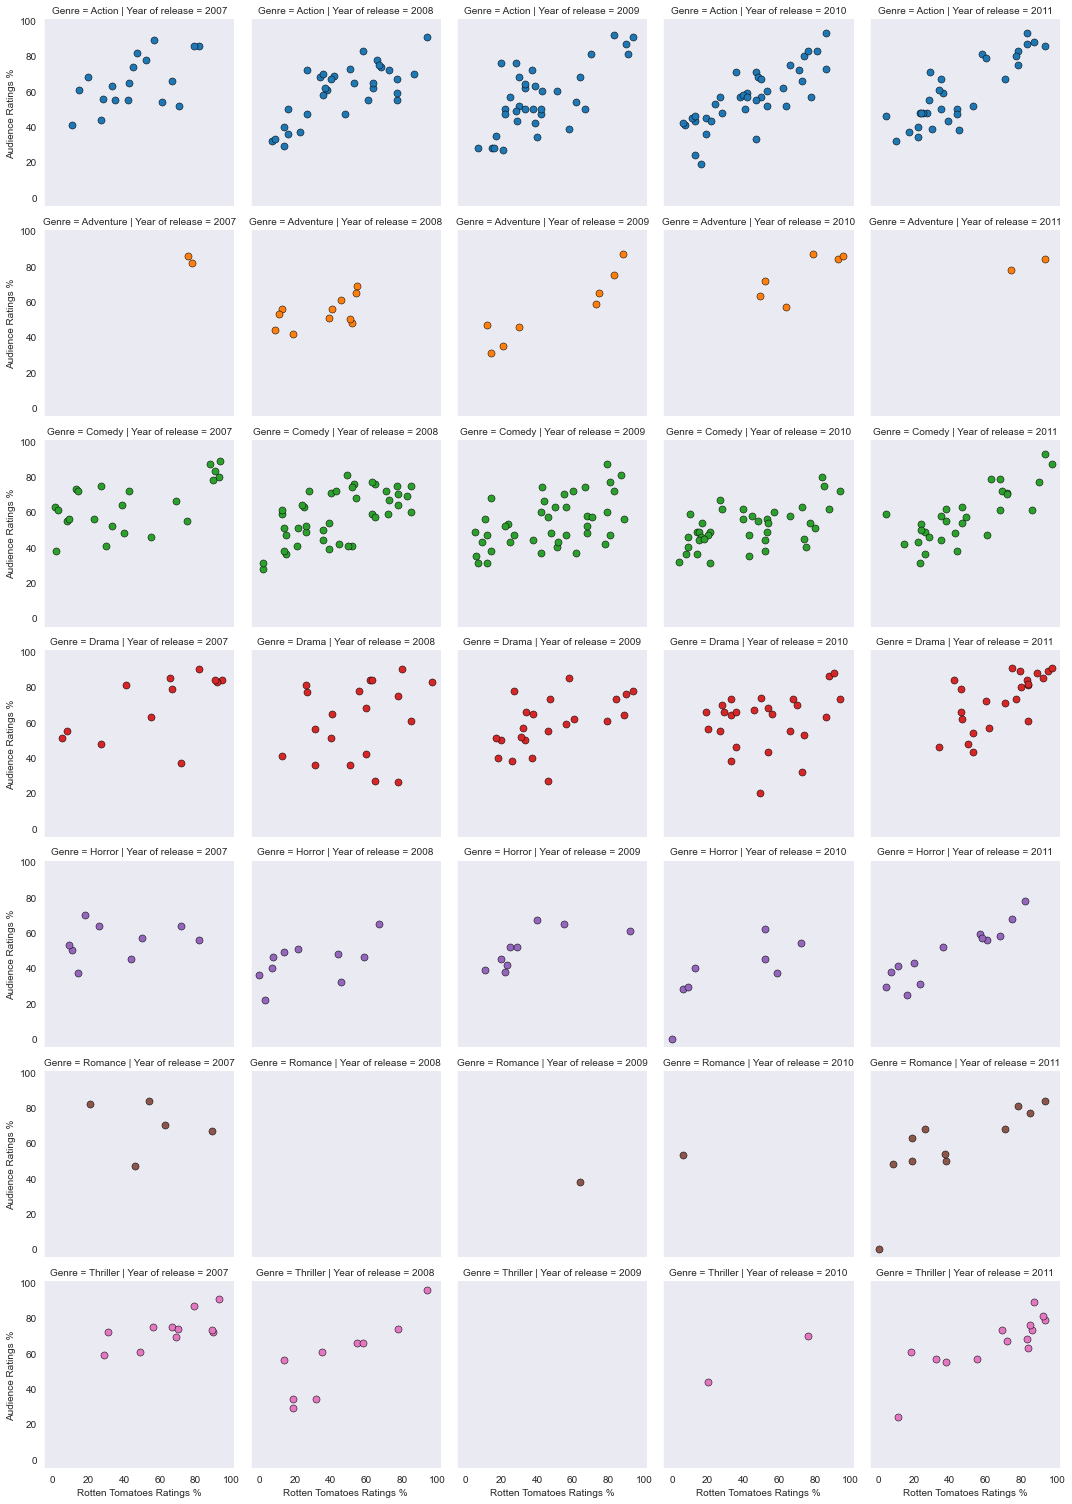

In [145]:
gs = sns.FacetGrid(movies, row='Genre', col='Year of release', hue='Genre')
kws=dict(s=50, linewidth=0.5, edgecolor='black')
gs = gs.map(plt.scatter, 'Rotten Tomatoes Ratings %', 'Audience Ratings %', **kws)

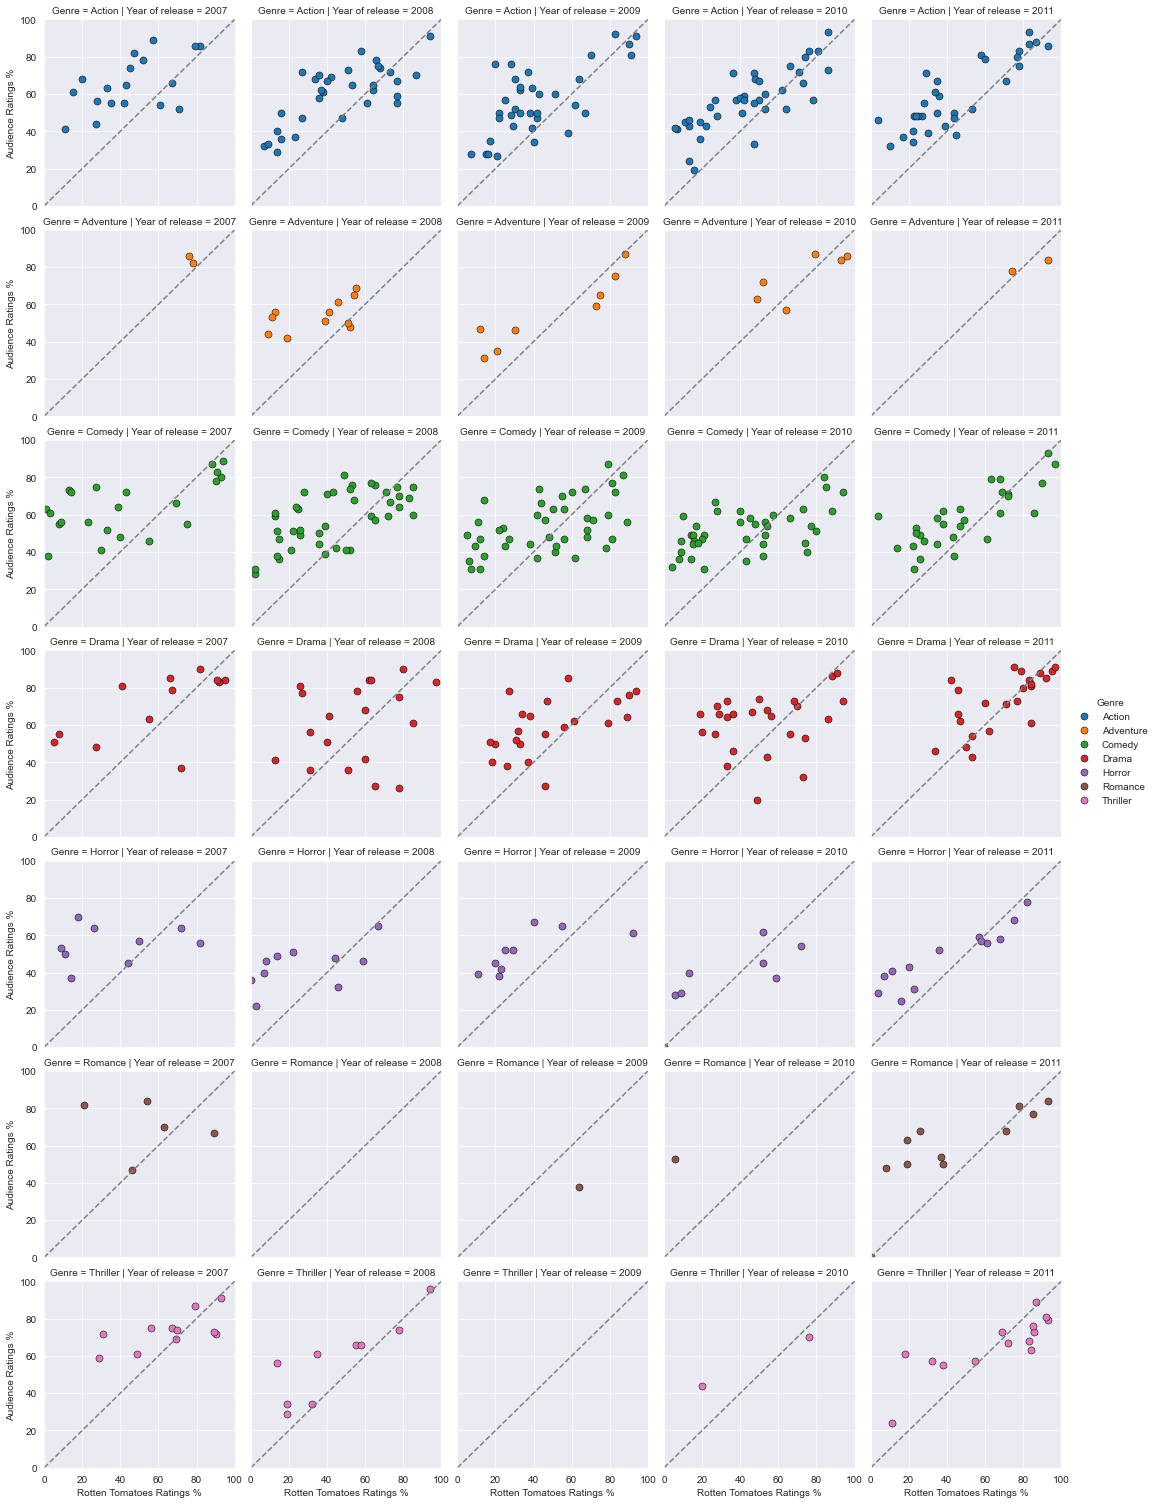

In [168]:
# Coordinates and Diagonals
gs = sns.FacetGrid(movies, row='Genre', col='Year of release', hue='Genre')
kws=dict(s=50, linewidth=0.5, edgecolor='black')
gs = gs.map(plt.scatter, 'Rotten Tomatoes Ratings %', 'Audience Ratings %', **kws)
gs.set(xlim=(0,100),ylim=(0,100))
for ax in gs.axes.flat:
    ax.plot((0,100), (0,100), c='gray', ls='--')
gs.add_legend()
plt.show()

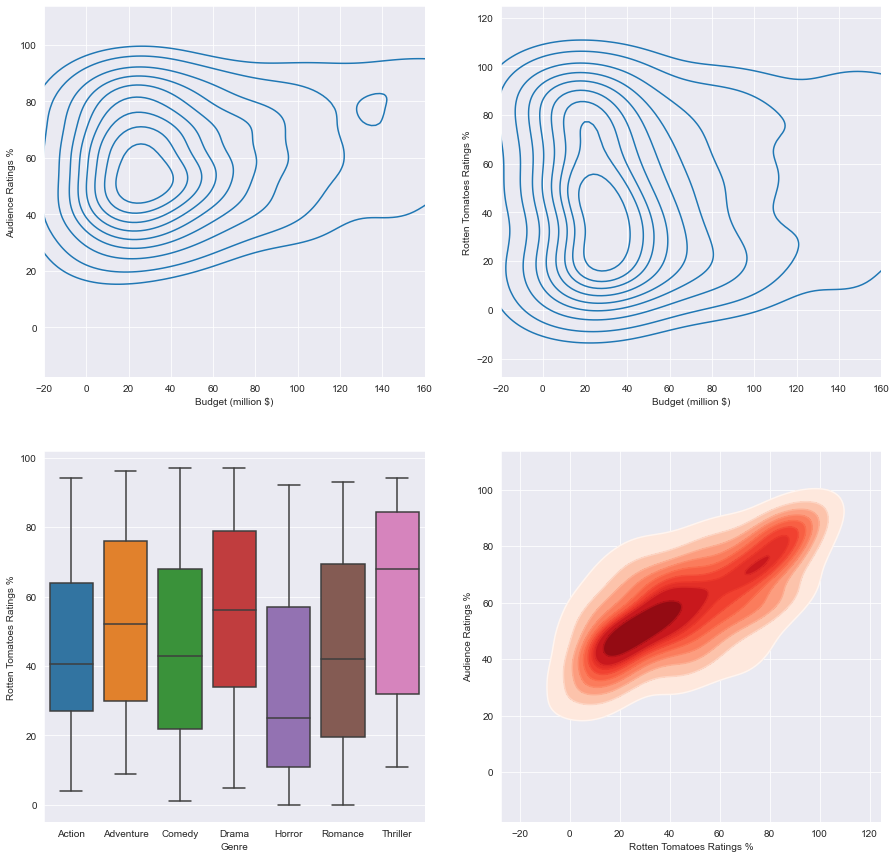

In [166]:
# Building dashboards
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize=(15,15)) # axis is pyplot, seaborn is built on top of pyplot
# so you cannot calles axes for seaborn, but seaborn has an axes argument to put into a pyplot dashboard
k1 = sns.kdeplot(movies['Budget (million $)'], movies['Audience Ratings %'], ax=axes[0,0])
k2 = sns.kdeplot(movies['Budget (million $)'], movies['Rotten Tomatoes Ratings %'], ax=axes[0,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
#axes[1,0].hist(movies['Rotten Tomatoes Ratings %'], bins=15)
b = sns.boxplot(data=movies, x='Genre', y='Rotten Tomatoes Ratings %', ax=axes[1,0])
#v = sns.violinplot(data=movies, x='Genre', y='Rotten Tomatoes Ratings %', ax=axes[1,1])
k1 = sns.kdeplot(movies['Rotten Tomatoes Ratings %'], movies['Audience Ratings %'], \
                 shade=True, shade_lowest=False, cmap='Reds', ax=axes[1,1])
k1b = sns.kdeplot(movies['Rotten Tomatoes Ratings %'], movies['Audience Ratings %'], cmap='Reds', ax=axes[1,1])
plt.show()

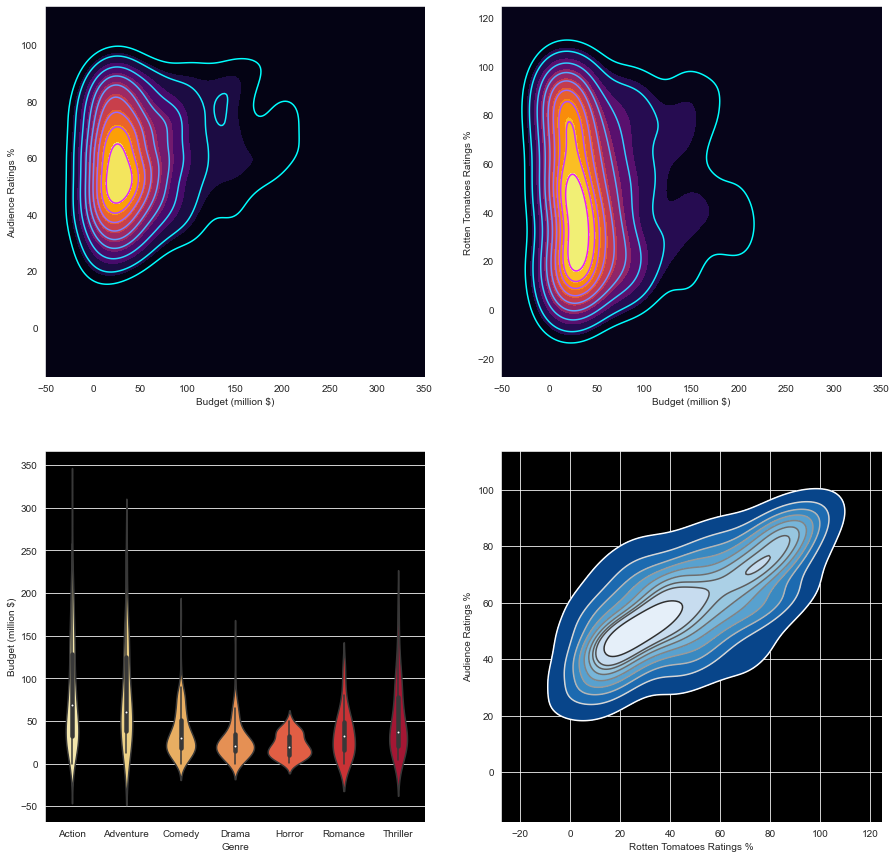

In [181]:
# Styling dashboards
sns.set_style('darkgrid', {"axes.facecolor": "black"}) # white, whitegrid, dark, darkgrid, ticks
f, axes = plt.subplots(2,2, figsize=(15,15))
k1 = sns.kdeplot(movies['Budget (million $)'], movies['Audience Ratings %'], \
                 shade=True, shade_lowest=True, cmap='inferno', ax=axes[0,0])
k1b = sns.kdeplot(movies['Budget (million $)'], movies['Audience Ratings %'], cmap='cool', ax=axes[0,0])

k2 = sns.kdeplot(movies['Budget (million $)'], movies['Rotten Tomatoes Ratings %'], \
                 shade=True, shade_lowest=True, cmap='inferno', ax=axes[0,1])
k2b = sns.kdeplot(movies['Budget (million $)'], movies['Rotten Tomatoes Ratings %'], cmap='cool', ax=axes[0,1])

v = sns.violinplot(data=movies, x='Genre', y='Budget (million $)', \
                   palette='YlOrRd', ax=axes[1,0])

k4 = sns.kdeplot(movies['Rotten Tomatoes Ratings %'], movies['Audience Ratings %'], \
                 shade=True, shade_lowest=False, cmap='Blues_r', ax=axes[1,1])
k4b = sns.kdeplot(movies['Rotten Tomatoes Ratings %'], movies['Audience Ratings %'], cmap='gist_gray_r', ax=axes[1,1])

plt.show()